# Linear Regressions and Simple Prediction Modeling using OLS **
**In this tutorial we show how Python and its  statsmodels library can be used to run Linear Regressions and Predictions for two exemplar models**

Session 3 | CK

## **Part A: Steps to Run Linear Regressions**

###**Step 1. Load libraries**

In [1]:
# If you have not previously installed non-default libraries, use this command to do so:
# NOTE: You only have to do this once
%pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------------------- -------------------- 4.7/9.6 MB 23.2 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 24.6 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 20.2 MB/s eta 0:00:00
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd # for data operations
import numpy as np #most of the mathematical functions we'll need
import seaborn as sns #to plot
import matplotlib.pyplot as plt #to plot
import statsmodels.api as sm #for statistical analysis

###**Step 2. Load Data**


Note: I'm providing cleaned data for class. In other cases with external data, you will have to clean your data.


In [3]:
url = "https://www.dropbox.com/s/oewvalvdxx7bjez/taxi_data.csv?dl=1" # url="/*insert url to your own data here*/"

In [4]:
df = pd.read_csv(url,low_memory=False) # this code is what reads the csv and turns it into a dataframe. df for short

df.shape # output the shape of the file


(490347, 19)

In [5]:
# see the head and tail of the data
#df.head()
#df.tail()
df

,Sl No.,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,0,VTS,14-05-13 18:31,14-05-13 19:18,1,17.47,-74.004052,40.742767,2,NaN,-73.782580,40.644107,CSH,52.0,0.0,0.5,0.00,0.0,52.50
1,1,VTS,14-05-13 19:24,14-05-13 19:34,2,1.60,0.000000,73.971158,1,NaN,-73.979937,40.780360,CSH,8.5,1.0,0.5,0.00,0.0,10.00
2,2,VTS,14-05-13 19:57,14-05-13 20:01,2,1.10,0.000000,0.000000,1,NaN,0.000000,0.000000,CRD,5.5,1.0,0.5,1.25,0.0,8.25
3,3,VTS,14-05-13 05:46,14-05-13 05:56,1,4.71,-73.975142,40.745937,1,NaN,-74.003527,40.710815,CSH,15.5,0.5,0.5,0.00,0.0,16.50
4,4,VTS,14-05-13 05:50,14-05-13 05:57,1,1.41,0.000000,0.000000,1,NaN,0.000000,0.000000,CRD,7.0,0.5,0.5,1.00,0.0,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490342,490342,CMT,14-05-13 20:32,14-05-13 20:38,1,1.50,-73.991023,40.745509,1,N,-73.973146,40.752741,CSH,7.0,0.5,0.5,0.00,0.0,8.00
490343,490343,CMT,14-05-13 20:43,14-05-13 20:43,1,1.50,-74.007035,40.705442,1,N,-73.992735,40.723427,CSH,9.0,0.5,0.5,0.00,0.0,10.00
490344,490344,CMT,14-05-13 20:35,14-05-13 20:37,1,1.00,-74.007057,40.729581,1,N,-74.010143,40.719790,CSH,5.5,0.5,0.5,0.00,0.0,6.50
490345,490345,CMT,14-05-13 20:35,14-05-13 20:35,1,0.80,-73.987804,40.737485,1,N,-74.001923,40.743530,CSH,5.0,0.5,0.5,0.00,0.0,6.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490347 entries, 0 to 490346
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Sl No.              490347 non-null  int64  
 1   vendor_id           490347 non-null  object 
 2   pickup_datetime     490347 non-null  object 
 3   dropoff_datetime    490347 non-null  object 
 4   passenger_count     490347 non-null  int64  
 5   trip_distance       490347 non-null  float64
 6   pickup_longitude    490347 non-null  float64
 7   pickup_latitude     490347 non-null  float64
 8   rate_code           490347 non-null  int64  
 9   store_and_fwd_flag  246795 non-null  object 
 10  dropoff_longitude   490347 non-null  float64
 11  dropoff_latitude    490347 non-null  float64
 12  payment_type        490347 non-null  object 
 13  fare_amount         490347 non-null  float64
 14  surcharge           490347 non-null  float64
 15  mta_tax             490347 non-nul

In [7]:
list(df.columns)

['Sl No.',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'rate_code',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount']

Note: Additional step here to convert data types if needed (eg. string to categories, etc...)

OR

We just subselect / sample only numerical data

In [8]:
# option 2: sampling only numerical data
numerical_df = df.select_dtypes(include=np.number)

In [9]:
# LEt's plot a correlation table
ctable = numerical_df.corr(method='pearson', min_periods=1)
round(ctable,2)

,Sl No.,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
Sl No.,1.00,-0.28,-0.03,-0.04,0.04,-0.01,-0.04,0.04,-0.04,0.19,0.00,-0.12,-0.03,-0.05
passenger_count,-0.28,1.00,0.02,0.02,-0.03,-0.00,0.02,-0.03,0.01,0.01,0.01,-0.01,0.01,0.01
trip_distance,-0.03,0.02,1.00,-0.01,0.00,0.22,-0.01,0.01,0.85,-0.05,-0.11,0.47,0.58,0.85
pickup_longitude,-0.04,0.02,-0.01,1.00,-0.81,0.04,0.96,-0.82,0.01,-0.01,-0.04,0.01,-0.00,0.01
pickup_latitude,0.04,-0.03,0.00,-0.81,1.00,-0.02,-0.79,0.74,-0.01,0.01,0.03,-0.01,0.00,-0.01
rate_code,-0.01,-0.00,0.22,0.04,-0.02,1.00,0.04,-0.03,0.34,-0.06,-0.44,0.18,0.25,0.34
dropoff_longitude,-0.04,0.02,-0.01,0.96,-0.79,0.04,1.00,-0.82,0.02,-0.01,-0.04,0.01,-0.00,0.01
dropoff_latitude,0.04,-0.03,0.01,-0.82,0.74,-0.03,-0.82,1.00,-0.01,0.01,0.03,-0.01,0.00,-0.01
fare_amount,-0.04,0.01,0.85,0.01,-0.01,0.34,0.02,-0.01,1.00,-0.09,-0.28,0.54,0.60,0.98
surcharge,0.19,0.01,-0.05,-0.01,0.01,-0.06,-0.01,0.01,-0.09,1.00,0.04,-0.03,-0.07,-0.06


<Axes: >

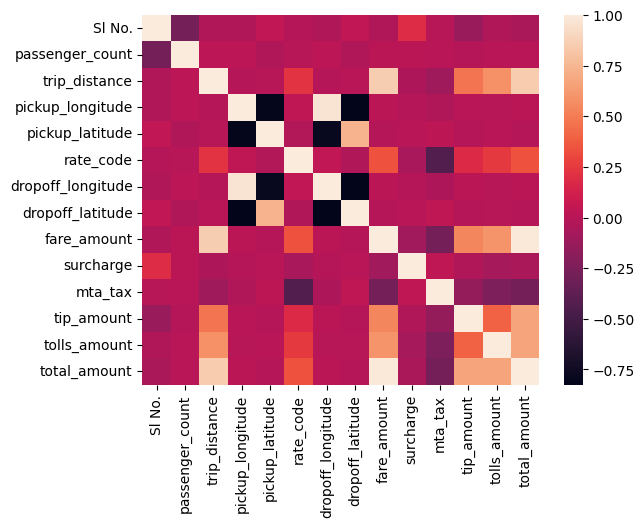

In [10]:
sns.heatmap(ctable)

ASSUME we are interested in the following simple objective:

***What is the relationship between Total Amount (taxi fare), trip distance, and # of passengers?***

###**Step 3. Sumamry Descriptive Stats and Plots**

In [11]:
# Summary statistics for our 3 variables of interest
df[['total_amount','passenger_count','trip_distance']].describe(include="all")

,total_amount,passenger_count,trip_distance
count,490347.000000,490347.000000,490347.000000
mean,14.816540,1.674055,2.767391
std,11.834598,1.376545,3.263962
min,3.000000,0.000000,0.000000
25%,8.000000,1.000000,1.000000
50%,11.400000,1.000000,1.700000
75%,16.500000,2.000000,3.000000
max,492.900000,6.000000,70.790000


<Axes: xlabel='passenger_count', ylabel='Count'>

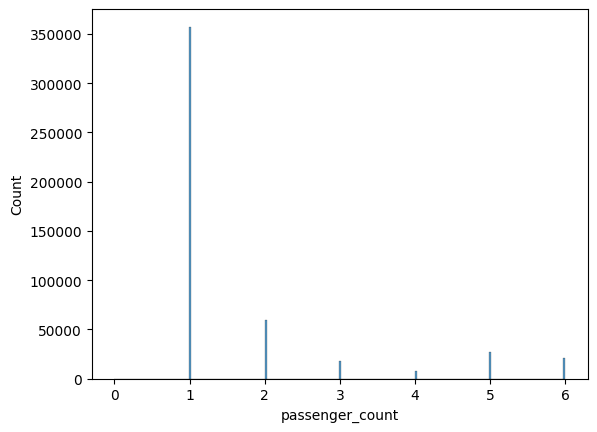

In [12]:
sns.histplot(df['passenger_count'])

<Axes: xlabel='total_amount'>

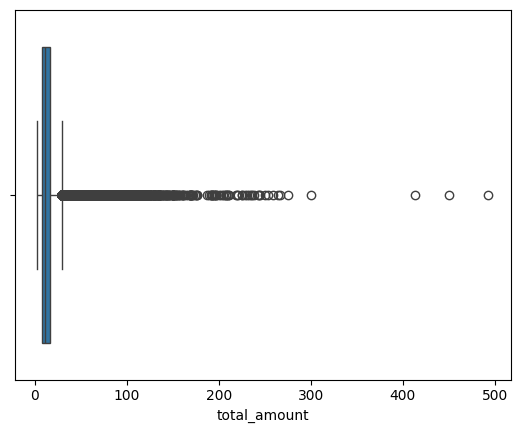

In [13]:
#sns.histplot(df['total_amount'])
sns.boxplot(x=df["total_amount"])

Note here that a) there are a lot of outliers, and b) you could probaby transform this data

<Axes: xlabel='trip_distance', ylabel='Count'>

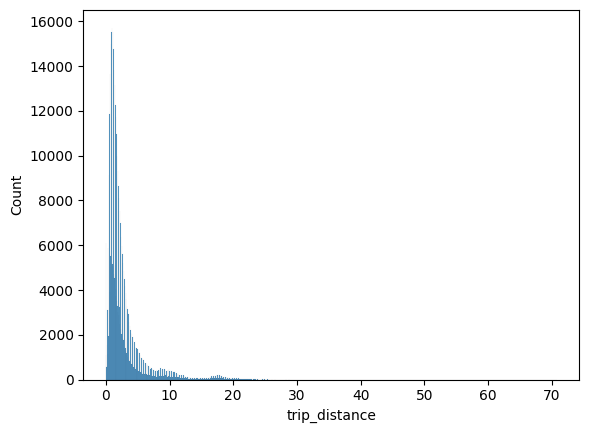

In [14]:
sns.histplot(df['trip_distance'])

We may have to deal with outliers here!

Let's manually figure out outliers!

In [15]:
df= df[df['trip_distance'] <=10] # drop trip distance above 10 miles
df= df[df['passenger_count'] >0] # drop 0 passengers
df= df[df['total_amount'] <100] # drop total fare <100
df.shape

(468562, 19)

Remember to rerun the summary stats and plots to see the effects!


###**Step 4. Define and Run Linear Model** (OLS shown here)

In [16]:
#Step 4.1: Define Model
DV=["total_amount"]
IV=["passenger_count","trip_distance"]
#IV["var1","var2","var3"]

In [17]:
#Step 4.2: Test Model
X = df[IV]
y = df[DV]

# add constant to the model
X_c = sm.add_constant(X)

# fit an OLS model
model = sm.OLS(y,X_c, missing="drop").fit()
modelSummary= model.summary()
print(modelSummary)

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                 2.918e+05
Date:                Mon, 07 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:08:34   Log-Likelihood:            -1.4358e+06
No. Observations:              468562   AIC:                         2.872e+06
Df Residuals:                  468559   BIC:                         2.872e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.2778      0.015    4

1. Look at the adj r-squared
2. look at the F statistic
3. Look at the Independent variables:
  3.1.   Is the coefficient size non zero?
  3.2.   Look at the p-value - is it significant?



Interpreting the Overall F-test of Significance

Compare the p-value for the F-test to your significance level. If the p-value is less than the significance level, your sample data provide sufficient evidence to conclude that your regression model fits the data better than the model with no independent variables.

#### Now let's run a model adding rate code

In [18]:
DV=["total_amount"]
IV=["passenger_count","trip_distance","rate_code"]
#IV["var1","var2","var3"]

In [19]:
X = df[IV]
y = df[DV]

# add constant to the model
X_c = sm.add_constant(X)

# fit an OLS model
model2 = sm.OLS(y,X_c, missing="drop").fit()
model2Summary= model2.summary()
print(model2Summary)

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 2.865e+05
Date:                Mon, 07 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:08:39   Log-Likelihood:            -1.3813e+06
No. Observations:              468562   AIC:                         2.763e+06
Df Residuals:                  468558   BIC:                         2.763e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.5171      0.039   -1

Did the addition of the new variable make a significant contribution?


    
    


1.   Did Adj R-squared improve?
2.   Do the newly added variables have a significant effect on the dv? (check coefficient size and p-value)
3. Do the newly added variables have a significant effect on the initial variables of interest? (check to see if coefficient size and p-values of the intial variables are different in this regression vs the one in step 4.2


You can keep new variables that add value to the model (increase in adj r-sqd or significant impact on dv), and "throw out" any of the variables that do not add value. When throwing out variables, do it one by one and make sure that they indeed have zero effect on the model. We "throw out" variables that are not relevant (no informational value) because we want to keep our model lean and prevent overfitting.


###**Step 5. Model Diagnostics!**


1. Residuals Plot - check if normally distributed

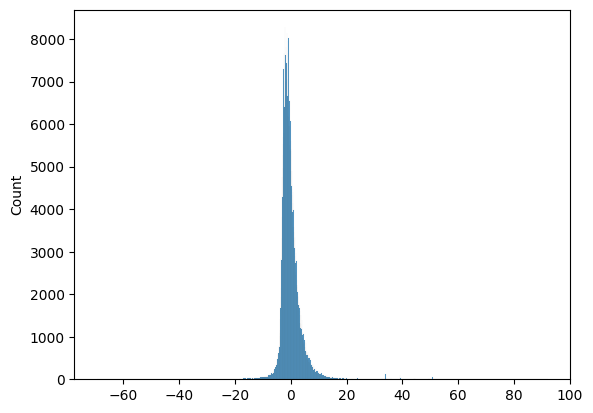

In [20]:
from scipy import stats
sns.histplot(model2.resid);
#sns.boxplot(model2.resid, showmeans=True);

Residuals look Normally distributed, so looking good

2. Q-Q plot for Residuals

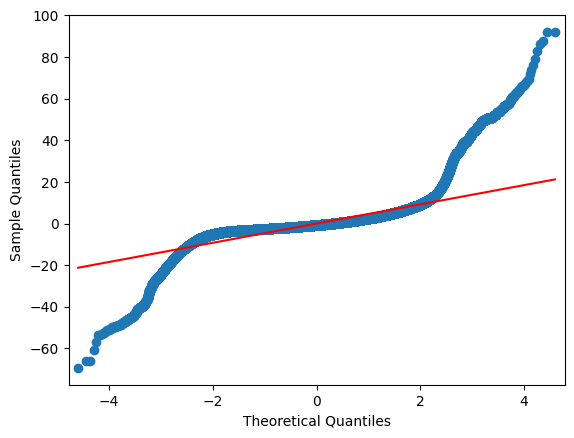

In [21]:
#sm.qqplot(model.resid, line='s');
sm.qqplot(model2.resid, line='s');

Outliers >2 and <-2 could be problematic

3. Residuals vs. Fitted

In [22]:
# Takes a while to run
#plot = sns.residplot(x=model2.fittedvalues, y='total_amount', data=df, lowess=True,
#                     scatter_kws={'alpha': 0.5},
#                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
#plot.set_title('Residuals vs Fitted')
#plot.set_xlabel('Fitted values')
#plot.set_ylabel('Residuals');

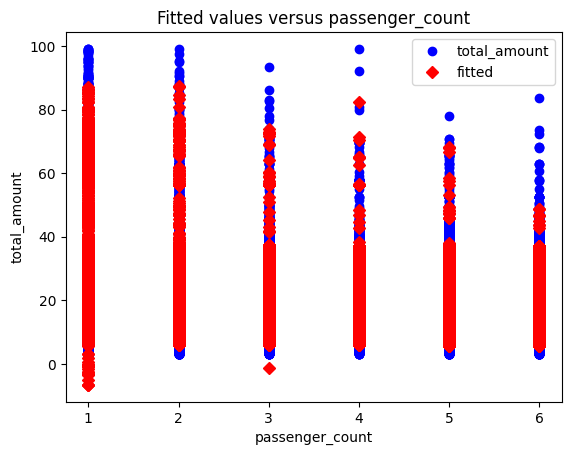

In [23]:
sm.graphics.plot_fit(model2,1, vlines=False);

In [24]:
# prompt: Perform a simple test-train split and try to predict Total amount from model 1 and model 2. Show performance using MAE, RMSE and MPE

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Define Dependent and Independent Variables
DV = "total_amount"
IV1 = ["passenger_count", "trip_distance"]
IV2 = ["passenger_count", "trip_distance", "rate_code"]

# Split data into training and testing sets (using model 1's IVs for the split)
X_train1, X_test1, y_train1, y_test1 = train_test_split(df[IV1], df[DV], test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df[IV2], df[DV], test_size=0.2, random_state=42)


# Model 1
X_train_c1 = sm.add_constant(X_train1)
model1 = sm.OLS(y_train1, X_train_c1, missing="drop").fit()

X_test_c1 = sm.add_constant(X_test1)
predictions1 = model1.predict(X_test_c1)

mae1 = mean_absolute_error(y_test1, predictions1)
rmse1 = math.sqrt(mean_squared_error(y_test1, predictions1))
mpe1 = np.mean((y_test1 - predictions1) / y_test1) * 100

print("Model 1 Performance:")
print(f"MAE: {mae1:.2f}")
print(f"RMSE: {rmse1:.2f}")
print(f"MPE: {mpe1:.2f}%")

# Model 2
X_train_c2 = sm.add_constant(X_train2)
model2_fitted = sm.OLS(y_train2, X_train_c2, missing="drop").fit()

X_test_c2 = sm.add_constant(X_test2)
predictions2 = model2_fitted.predict(X_test_c2)

mae2 = mean_absolute_error(y_test2, predictions2)
rmse2 = math.sqrt(mean_squared_error(y_test2, predictions2))
mpe2 = np.mean((y_test2 - predictions2) / y_test2) * 100

print("\nModel 2 Performance:")
print(f"MAE: {mae2:.2f}")
print(f"RMSE: {rmse2:.2f}")
print(f"MPE: {mpe2:.2f}%")


Model 1 Performance:
MAE: 2.68
RMSE: 5.19
MPE: -10.23%

Model 2 Performance:
MAE: 2.58
RMSE: 4.63
MPE: -9.19%
